# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**@Finding**

***Understanding the Data***

According to the information provided in the UCI Machine Learning Repository and the article "A Data-Driven Approach to Predict the Success of Bank Telemarketing" (Moro et al., 2014), the dataset contains data collected from 17 different marketing campaigns. These campaigns were conducted by a Portuguese banking institution over the period from May 2008 to November 2010. The purpose of these campaigns was to promote term deposit subscriptions through telemarketing calls.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**@Finding**

After successfully loading the dataset into the ***df***  DataFrame, I examined the first few rows and confirmed that the data was read correctly. Each row represents a single telemarketing contact with a client, and each column corresponds to a specific feature, such as:

Client Information (e.g., age, job, marital status, education)

Contact Details (e.g., contact method, last contact month and day)

Campaign-related Info (e.g., number of contacts during the campaign)

Socioeconomic Context (e.g., employment variation rate, consumer confidence index)

Target Variable (y): whether the client subscribed to a term deposit

The dataset appears clean and well-structured, making it suitable for further preprocessing and modeling tasks.

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [6]:
# Count 'unknown' values in each column
unknown_counts = (df == 'unknown').sum()

# Columns contain 'unknown'
unknown_counts = unknown_counts[unknown_counts > 0]


print("Columns with 'unknown' and their counts:")
print(unknown_counts)

Columns with 'unknown' and their counts:
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64


**@Finding**

**Summary:**

No null/missing values in the dataset.

While the dataset does not contain any missing values in the form of NaN, several features use the string 'unknown' to represent missing or unspecified information. After analyzing the dataset, the following columns were found to contain 'unknown' values:

* job
* marital
* education
* default
* housing
* loan

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**@Finding**

**Business Objective:**

The primary business objective is to predict whether a client will subscribe to a term deposit based on their personal, financial, and interaction data collected during previous telemarketing campaigns.

By analyzing past campaign data and client attributes, it can be aimed to build a model that can accurately classify potential clients into those who are likely to subscribe (yes) and those who are not (no). This will help the bank prioritize high-potential leads and enhance the effectiveness of future strategies.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

**@Info**

To prepare the data for modeling, we have to do:

* Selecting relevant features

* Encoding categorical variables

* Separating features and the target column

For this task, the bank client information features will be used.

Based on the description, the bank-related features are:

age (numeric)

job (categorical)

marital (categorical)

education (categorical)

default (categorical)

housing (categorical)

loan (categorical)

Target:

y (binary: 'yes' or 'no')

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Step 2: Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Step 3: Remove duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

# Step 4: Handle 'unknown' values in categorical features
# Replace 'unknown' with most frequent value
cat_cols_with_unknown = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in cat_cols_with_unknown:
    mode = df[col].mode()[0]
    df.loc[:, col] = df[col].replace('unknown', mode)

# Select only bank client features
client_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
X = df[client_features]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Encode the target variable 'y' (yes ->1, no -> 0)
le = LabelEncoder()
y = le.fit_transform(df['y'])

# Checking the final results
print("\nEncoded feature sample:")
print(X_encoded.head())

print("\nTarget value counts:")
print(pd.Series(y).value_counts())

Missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Number of duplicate rows: 12
Duplicate rows removed.

Encoded feature sample:
   age  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0   56            False             False           True           False   
1   57            False             False          False           False   
2   37            False             False          False           False   
3   40            False             False          False           False   
4   56            False             False          False           False   

   j

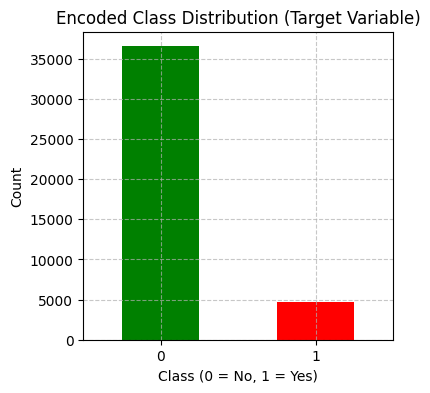

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the encoded target to a Series for easy plotting
y_series = pd.Series(y)

# Plot class distribution
plt.figure(figsize=(4, 4))
y_series.value_counts().sort_index().plot(kind='bar', color=['green', 'red'])
plt.grid(True, which='major', axis='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.xlabel("Class (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Encoded Class Distribution (Target Variable)")
plt.show()

**@Finding**

**Summary of Preprocessing Steps**

1. Data Loading

2. Checked for Missing Values

3. Removed Duplicates

4. Handled 'unknown' Values in Categorical Columns

5. Selected Bank Client Features

 age, job, marital, education, default, housing, loan

6. Encoded Categorical Variables
7. Encoded the target variable y, converting:

  'no' -> 0

  'yes' -> 1

8. Counted the values of the target variable:

  No (0): 36537 clients

  Yes (1): 4639 clients

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [10]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (32940, 22) (32940,)
Test set shape: (8236, 22) (8236,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

**@Info:**

In a classification problem, a common baseline is the accuracy of always predicting the most frequent class.

From earlier, we saw the class distribution in the target variable y:

0 (no) ->  36537 samples  
1 (yes) ->  4639 samples

baseline_accuracy = 36537 / (36537 + 4639) = 0.8873

In [11]:
import numpy as np

# To return a count of how many times each class appears
class_counts = np.bincount(y)

# Calculate baseline accuracy: majority class count / total count
# class_counts.max() gives the count of the most frequent class
# class_counts.sum() gives the total number of samples
baseline_accuracy = class_counts.max() / class_counts.sum()

print(f"Baseline accuracy (majority class): {baseline_accuracy:.4f}")

Baseline accuracy (majority class): 0.8873


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.6151

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      7308
           1       0.16      0.56      0.25       928

    accuracy                           0.62      8236
   macro avg       0.54      0.59      0.49      8236
weighted avg       0.83      0.62      0.69      8236


Confusion Matrix:
[[4550 2758]
 [ 412  516]]


### Problem 9: Score the Model

What is the accuracy of your model?

In [13]:
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the result
print(f"Logistic Regression Accuracy is: {accuracy:.4f}")

Logistic Regression Accuracy is: 0.6151


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

I am going to train and evaluate multiple models and compare the following properties:

* Training time

* Training accuracy

* Test accuracy

for the following models:

1. Logistic Regression

2. K-Nearest Neighbors (KNN)

3. Decision Tree

4. Support Vector Machine (SVM)

In [14]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Initialize the models

models = {
    'Logistic Regression' : LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced'),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine (SVM)': SVC()
}

#DataFRame stores in result
results=[]
#results = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

# Loop through each model
for name, model in models.items():
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Record training time
    train_time = time.time() - start_time

    # Predict
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Evaluate accuracy
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    # Save results
    results.append({
        "Model": name,
        "Train Time (s)": round(train_time, 4),
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by="Test Accuracy", ascending=False, inplace=True)

# Display results
results_df.reset_index(drop=True, inplace=True)
results_df



,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Support Vector Machine (SVM),15.9037,0.8873,0.8873
1,K-Nearest Neighbors (KNN),0.0163,0.8873,0.8754
2,Decision Tree,0.0921,0.9088,0.8714
3,Logistic Regression,0.1111,0.6236,0.6151


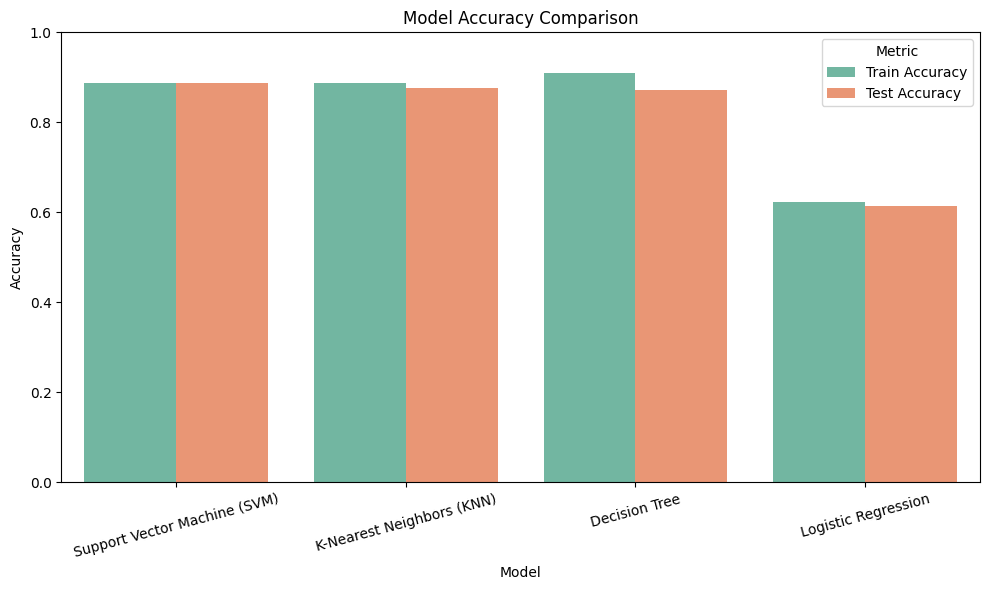

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a bar plot comparing Train and Test Accuracy
plt.figure(figsize=(10, 6))
results_df_melted = results_df.melt(id_vars="Model", value_vars=["Train Accuracy", "Test Accuracy"],
                                     var_name="Metric", value_name="Accuracy")

sns.barplot(x="Model", y="Accuracy", hue="Metric", data=results_df_melted, palette="Set2")

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

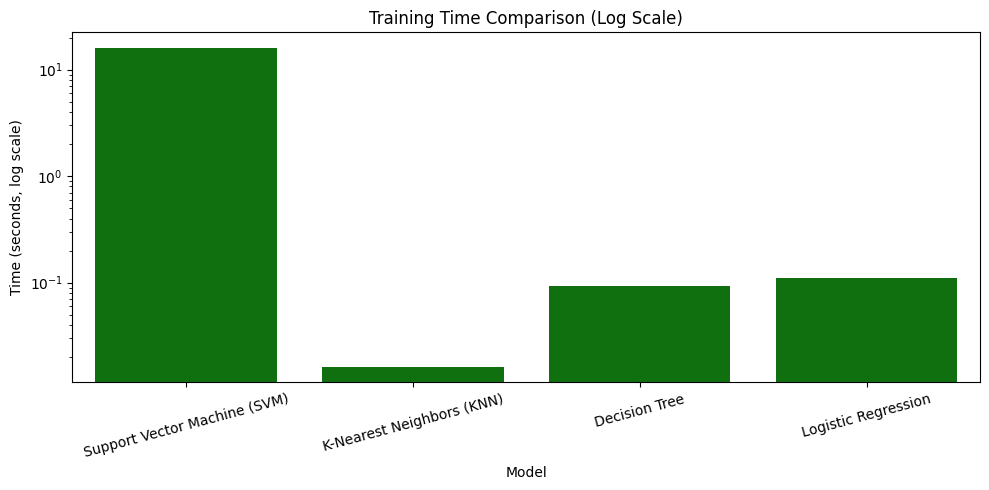

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Train Time (s)", data=results_df, color="green")

plt.title("Training Time Comparison (Log Scale)")
plt.ylabel("Time (seconds, log scale)")
# Set the y-axis to logarithmic scale
plt.yscale('log')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

**Analysis and Insights**


**Best Test Performance:**

The Support Vector Machine (SVM) still delivers the highest test accuracy (88.73%), showing strong generalization. However, it has the longest training time by far (~15.9 seconds).

**Efficiency Winner:**

K-Nearest Neighbors (KNN) trains almost instantly (~0.016s) and still performs very well (87.54% test accuracy). This makes it a great choice for quick, reliable classification.

**Decision Tree Observations:**

While the Decision Tree had the highest training accuracy (90.88%), its drop in test accuracy (87.04%) suggests overfitting.

**Logistic Regression Underperformance:**

Despite class balancing, Logistic Regression achieved the lowest test accuracy (61.51%).

**Final Recommendation:**

For this dataset, SVM offers the best overall accuracy, though it's computationally expensive. KNN is the best trade-off between performance and speed. The Decision Tree is strong but may benefit from pruning or tuning. Logistic Regression underperforms.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**11.1**

If a gender feature were present, we would need to carefully evaluate whether to include it. While gender might contribute predictive value, such as bias or discrimination in the model's decisions.


**11.2**

**Hyperparameter Tuning**

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(3, 21)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best cross-validated accuracy:", grid_knn.best_score_)

Best parameters for KNN: {'n_neighbors': 18}
Best cross-validated accuracy: 0.8861566484517305


In [18]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print("Best params for Decision Tree:", grid_dt.best_params_)
print("Best cross-val accuracy:", grid_dt.best_score_)

Best params for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}
Best cross-val accuracy: 0.8873102610807528


**11.3**

**Adjust your performance metric**

KNN with f1 Score:

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(3, 21)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')  # ← changed here
grid_knn.fit(X_train, y_train)

print("Best parameters for KNN (F1):", grid_knn.best_params_)
print("Best cross-validated F1 score:", grid_knn.best_score_)


Best parameters for KNN (F1): {'n_neighbors': 3}
Best cross-validated F1 score: 0.13801727442463893


Decision Tree with f1 Score:

In [22]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1')  # ← changed here
grid_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree (F1):", grid_dt.best_params_)
print("Best cross-validated F1 score:", grid_dt.best_score_)

Best parameters for Decision Tree (F1): {'max_depth': None, 'min_samples_split': 2}
Best cross-validated F1 score: 0.12131858062114828


Using scoring='f1' in GridSearchCV allowed us to select hyperparameters that optimize the model’s ability to detect meaningful positive outcomes.

##### Questions